In [7]:
import matplotlib.pyplot as plt
from typing import List, Optional
import tensorflow as tf
import sys
sys.path.append('./src')
from autoencoder import Autoencoder
from SINDY import sindy_library_tf
from HIFF import generate_training_sat

In [8]:
# generate the trainig set 
print("[INFO] generating trainnig dataset...")
(trainX, trainY) = generate_training_sat(32, 300)

# generate the test set 
print("[INFO] generating testing dataset...")
(testX, testY) = generate_training_sat(32,60)

[INFO] generating trainnig dataset...
[INFO] generating testing dataset...


In [4]:
epochs = 20
batch_size = 5
# "layers_params" : [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}],

model = Autoencoder([32, 25], ekwargs = {
        "name" : "fucku",
        "layers_params" : [{"l1": 0.001, "l2" : 0.0, "dropout" : 0.2}, {"l1" : 0.001}],
        'layers_default_params' : {
        'l1' : 0.001, 
        'l2' : 0.0, 
        'dropout' : 0.2, 
        'activation' : "tanh",
        'kernel_initializer' : tf.keras.initializers.RandomNormal(stddev=0.01),
        'bias_initializer' : tf.keras.initializers.Zeros()
        },
})
model.build_graph().summary()
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
        loss="mse")

# model.fit(trainY, trainY, 
# epochs = epochs, 
# batch_size = batch_size, 
# verbose = 1)

# plt.imshow(model.encoder.weights[0].numpy())

[{'l1': 0.001, 'l2': 0.0, 'dropout': 0.2, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7f2159c07c88>, 'bias_initializer': <keras.initializers.initializers_v2.Zeros object at 0x7f2159c07d30>}, {'l1': 0.001, 'l2': 0.0, 'dropout': 0.2, 'activation': 'tanh', 'kernel_initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x7f2159c07c88>, 'bias_initializer': <keras.initializers.initializers_v2.Zeros object at 0x7f2159c07d30>}]
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
autoencoder_input (InputLaye [(None, 32)]              0         
_________________________________________________________________
fucku_0_dropout (Dropout)    (None, 32)                0         
_________________________________________________________________
fucku_0 (Dense)              (None, 25)                825       
__________________

In [9]:
# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((trainY, trainY))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((testY, testY))
val_dataset = val_dataset.batch(batch_size)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

params = {}
params['coefficient_initialization'] = tf.keras.initializers.GlorotUniform()(shape = (2,2))

In [10]:
import time

loss_fn = tf.keras.losses.MeanSquaredError()
train_acc_metric = tf.keras.metrics.Mean()
val_acc_metric = tf.keras.metrics.Mean()

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        model.optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 0.0683
Seen so far: 5 samples
Training acc over epoch: 0.9334
Validation acc: 0.9225
Time taken: 1.14s

Start of epoch 1
Training loss (for one batch) at step 0: 0.0383
Seen so far: 5 samples
Training acc over epoch: 0.9444
Validation acc: 0.9222
Time taken: 1.33s

Start of epoch 2
Training loss (for one batch) at step 0: 0.0233
Seen so far: 5 samples
Training acc over epoch: 0.9434
Validation acc: 0.9392
Time taken: 1.35s

Start of epoch 3
Training loss (for one batch) at step 0: 0.0577
Seen so far: 5 samples
Training acc over epoch: 0.9447
Validation acc: 0.9282
Time taken: 1.32s

Start of epoch 4
Training loss (for one batch) at step 0: 0.0263
Seen so far: 5 samples
Training acc over epoch: 0.9433
Validation acc: 0.9672
Time taken: 0.74s

Start of epoch 5
Training loss (for one batch) at step 0: 0.0706
Seen so far: 5 samples
Training acc over epoch: 0.9509
Validation acc: 0.9861
Time taken: 0.86s

Start of epoch 6
Training l

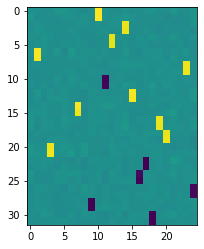

In [11]:
plt.imshow(model.weights[0])

In [ ]:
model.los